In [1]:
import pickle
import sys
sys.path.insert(1, '../library')
import database_helper
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import IPython
import IPython.display


2024-08-31 13:58:45.925643: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-31 13:58:45.932644: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-31 13:58:45.993983: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-31 13:58:46.053705: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-31 13:58:46.100289: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
with open('selected_columns.pkl', 'rb') as f:
    selected_columns = pickle.load(f)
df = database_helper.query_data(field_list=selected_columns)

Executing Query 1 (Maximum 5 days)
Executing Query 2 (Maximum 5 days)
Executing Query 3 (Maximum 5 days)
Executing Query 4 (Maximum 5 days)
Executing Query 5 (Maximum 5 days)
Executing Query 6 (Maximum 5 days)
Executing Query 7 (Maximum 5 days)


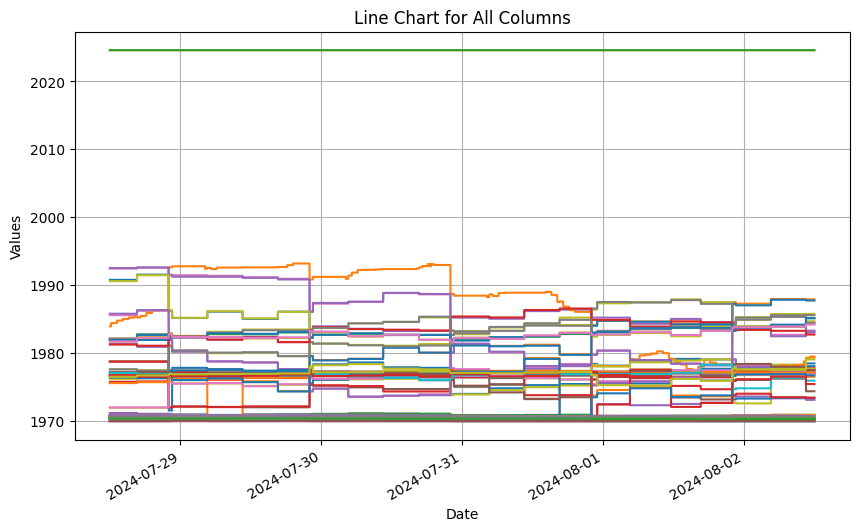

In [3]:
plot_df = df.copy()
plot_df['_time'] = pd.to_datetime(plot_df['_time'])
plot_df.set_index('_time', inplace=True)

plot_df.plot(kind='line', figsize=(10, 6), title='Line Chart for All Columns', legend=False)
plt.xlabel('Date')  # Label for the x-axis
plt.ylabel('Values')  # Label for the y-axis
plt.grid(True)  # Add grid lines for better readability
plt.show()

In [4]:
date_time = pd.to_datetime(df.pop('_time'), format='%d.%m.%Y %H:%M:%S')
df = df.select_dtypes(include='float64')
df.interpolate(inplace=True)
display(df)
display(date_time)

,10838_days_0_precipitation,10838_days_0_temperatureMax,10838_days_0_windDirection,10838_days_1_sunshine,10838_days_1_temperatureMin,10838_days_1_windDirection,10838_days_2_precipitation,10838_days_2_sunshine,10838_days_2_temperatureMax,10838_days_2_temperatureMin,...,10840_days_7_windDirection,10840_days_8_sunshine,10840_days_8_temperatureMax,10840_days_8_temperatureMin,10840_days_8_windDirection,10840_days_8_windGust,10840_days_9_precipitation,10840_days_9_sunshine,10840_days_9_temperatureMax,10840_days_9_windDirection
0,59.0,229.0,3210.0,8200.0,119.0,720.0,0.0,7590.0,303.0,123.0,...,2580.0,4360.0,236.0,151.0,2470.0,315.0,0.0,4280.0,246.0,2380.0
1,59.0,229.0,3210.0,8200.0,119.0,720.0,0.0,7590.0,303.0,123.0,...,2580.0,4360.0,236.0,151.0,2470.0,315.0,0.0,4280.0,246.0,2380.0
2,59.0,229.0,3210.0,8200.0,119.0,720.0,0.0,7590.0,303.0,123.0,...,2580.0,4360.0,236.0,151.0,2470.0,315.0,0.0,4280.0,246.0,2380.0
3,59.0,229.0,3210.0,8200.0,119.0,720.0,0.0,7590.0,303.0,123.0,...,2580.0,4360.0,236.0,151.0,2470.0,315.0,0.0,4280.0,246.0,2380.0
4,59.0,229.0,3210.0,8200.0,119.0,720.0,0.0,7590.0,303.0,123.0,...,2580.0,4360.0,236.0,151.0,2470.0,315.0,0.0,4280.0,246.0,2380.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43186,17.0,232.0,2770.0,2610.0,163.0,2520.0,0.0,2950.0,230.0,157.0,...,2170.0,5530.0,255.0,156.0,1990.0,278.0,0.0,5190.0,252.0,3310.0
43187,17.0,232.0,2770.0,2610.0,163.0,2520.0,0.0,2950.0,230.0,157.0,...,2170.0,5530.0,255.0,156.0,1990.0,278.0,0.0,5190.0,252.0,3310.0
43188,17.0,232.0,2770.0,2610.0,163.0,2520.0,0.0,2950.0,230.0,157.0,...,2170.0,5530.0,255.0,156.0,1990.0,278.0,0.0,5190.0,252.0,3310.0
43189,17.0,232.0,2770.0,2610.0,163.0,2520.0,0.0,2950.0,230.0,157.0,...,2170.0,5530.0,255.0,156.0,1990.0,278.0,0.0,5190.0,252.0,3310.0


0       2024-07-28 12:00:00+00:00
1       2024-07-28 12:00:10+00:00
2       2024-07-28 12:00:20+00:00
3       2024-07-28 12:00:30+00:00
4       2024-07-28 12:00:40+00:00
                   ...           
43186   2024-08-02 11:59:10+00:00
43187   2024-08-02 11:59:20+00:00
43188   2024-08-02 11:59:30+00:00
43189   2024-08-02 11:59:40+00:00
43190   2024-08-02 11:59:50+00:00
Name: _time, Length: 43191, dtype: datetime64[ns, UTC]

In [5]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
10838_days_0_precipitation,43191.0,30.484754,26.292735,0.0,10.0,18.0,52.0,95.0
10838_days_0_temperatureMax,43191.0,269.719340,32.246366,222.0,247.0,261.0,307.0,313.0
10838_days_0_windDirection,43191.0,2043.514390,744.205195,720.0,1720.0,2340.0,2440.0,3210.0
10838_days_1_sunshine,43191.0,4887.706004,2442.327383,1990.0,2610.0,2980.0,7650.0,8240.0
10838_days_1_temperatureMin,43191.0,165.576856,25.794756,119.0,133.0,179.0,186.0,190.0
...,...,...,...,...,...,...,...,...
10840_days_8_windGust,43191.0,282.828923,17.904847,259.0,259.0,278.0,296.0,315.0
10840_days_9_precipitation,43191.0,0.690144,2.566748,0.0,0.0,0.0,0.0,14.0
10840_days_9_sunshine,43191.0,4634.959830,213.435547,4260.0,4480.0,4600.0,4780.0,5190.0
10840_days_9_temperatureMax,43191.0,244.640990,2.652609,232.0,242.0,245.0,247.0,252.0


Text(0.5, 1.0, 'Time of day signal')

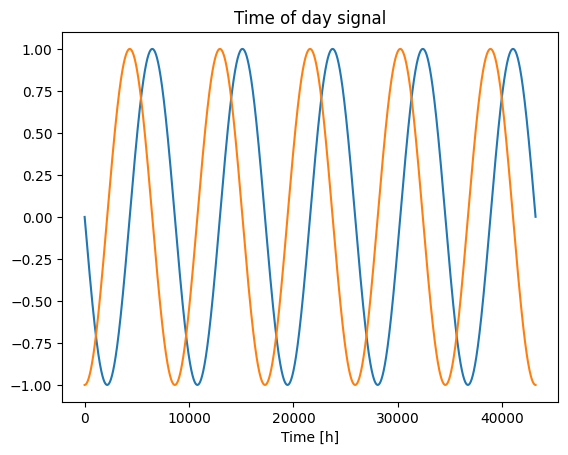

In [6]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))
plt.plot(np.array(df['Day sin'])[:])
plt.plot(np.array(df['Day cos'])[:])
plt.xlabel('Time [h]')
plt.title('Time of day signal')


In [7]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]


In [8]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

/tmp/ipykernel_58240/2828228499.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


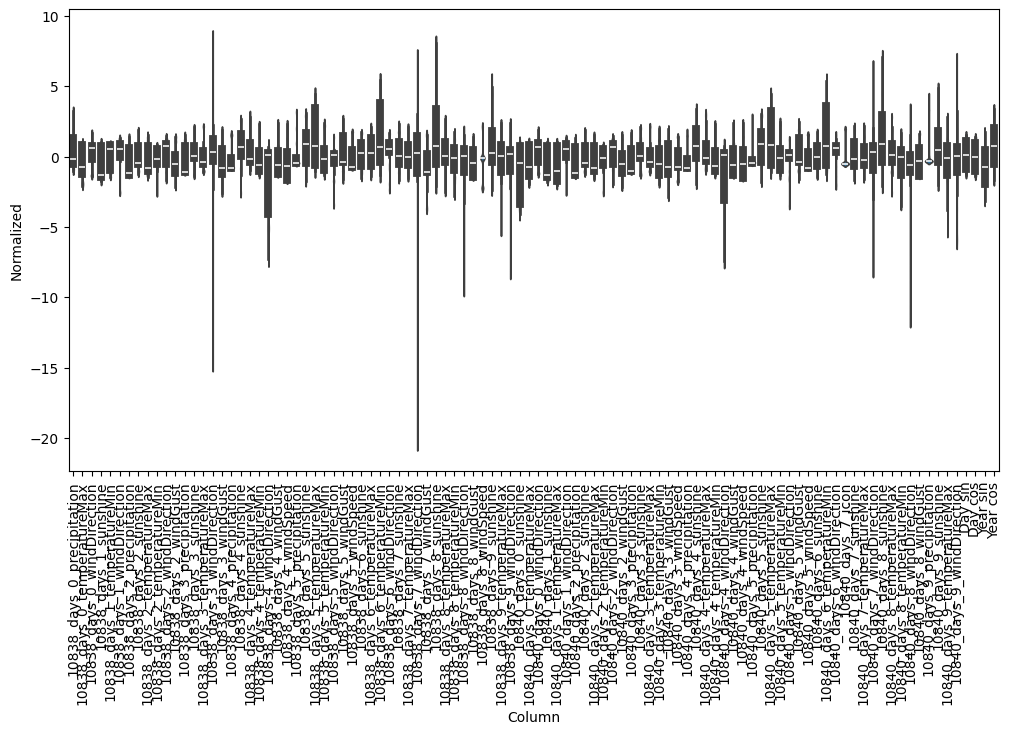

In [9]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)


In [10]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])


In [11]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['10838_days_1_sunshine'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['10838_days_1_sunshine']

In [12]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['10838_days_1_sunshine'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['10838_days_1_sunshine']

In [13]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [14]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')


All shapes are: (batch, time, features)
Window shape: (3, 7, 100)
Inputs shape: (3, 6, 100)
Labels shape: (3, 1, 1)


In [15]:
# remove?
w2.example = example_inputs, example_labels

In [16]:
# remove ?
def plot(self, model=None, plot_col='10838_days_1_sunshine', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

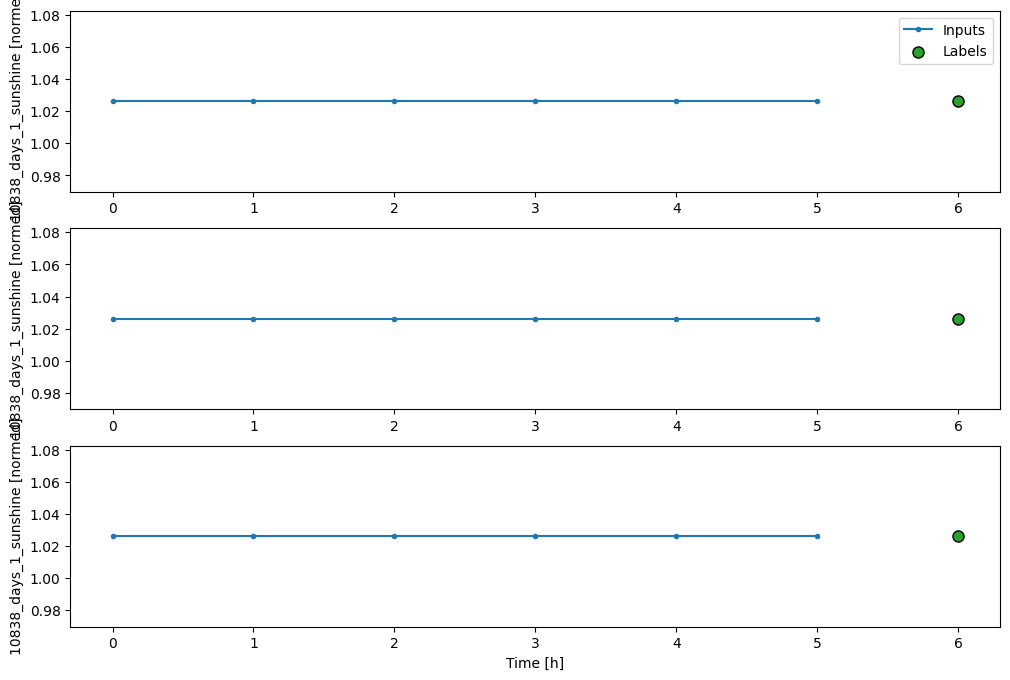

In [17]:
w2.plot()


In [18]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [19]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [20]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 6, 100), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [21]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')


Inputs shape (batch, time, features): (32, 6, 100)
Labels shape (batch, time, features): (32, 1, 1)


2024-08-31 14:00:13.452502: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Single Step Model

In [22]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['10838_days_1_sunshine'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['10838_days_1_sunshine']

In [23]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')


Inputs shape (batch, time, features): (32, 1, 100)
Labels shape (batch, time, features): (32, 1, 1)


2024-08-31 14:00:13.522107: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [24]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]


In [25]:
baseline = Baseline(label_index=column_indices['10838_days_1_sunshine'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val, return_dict=True)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0, return_dict=True)


270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - loss: 4.5579e-06 - mean_absolute_error: 2.9027e-05


In [26]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['10838_days_1_sunshine'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['10838_days_1_sunshine']

In [27]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)


Input shape: (32, 24, 100)
Output shape: (32, 24, 1)


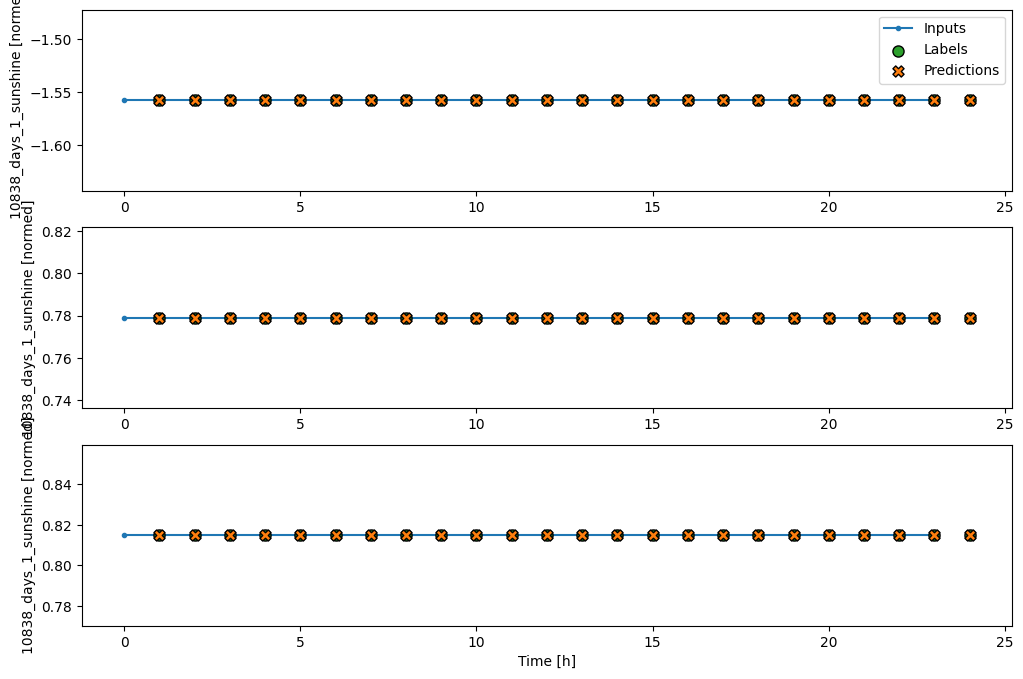

In [28]:
wide_window.plot(baseline)


In [29]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)


Input shape: (32, 1, 100)
Output shape: (32, 1, 1)


In [30]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [31]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val, return_dict=True)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0, return_dict=True)


Epoch 1/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 1s 564us/step - loss: 0.1400 - mean_absolute_error: 0.2277 - val_loss: 1.1925 - val_mean_absolute_error: 0.8892
Epoch 2/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 1s 514us/step - loss: 1.9638e-04 - mean_absolute_error: 0.0082 - val_loss: 1.2390 - val_mean_absolute_error: 0.9096
Epoch 3/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 1s 515us/step - loss: 1.3504e-04 - mean_absolute_error: 0.0050 - val_loss: 1.2392 - val_mean_absolute_error: 0.9145
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 1.2621 - mean_absolute_error: 0.9218


In [32]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', linear(wide_window.example[0]).shape)


Input shape: (32, 24, 100)
Output shape: (32, 24, 1)


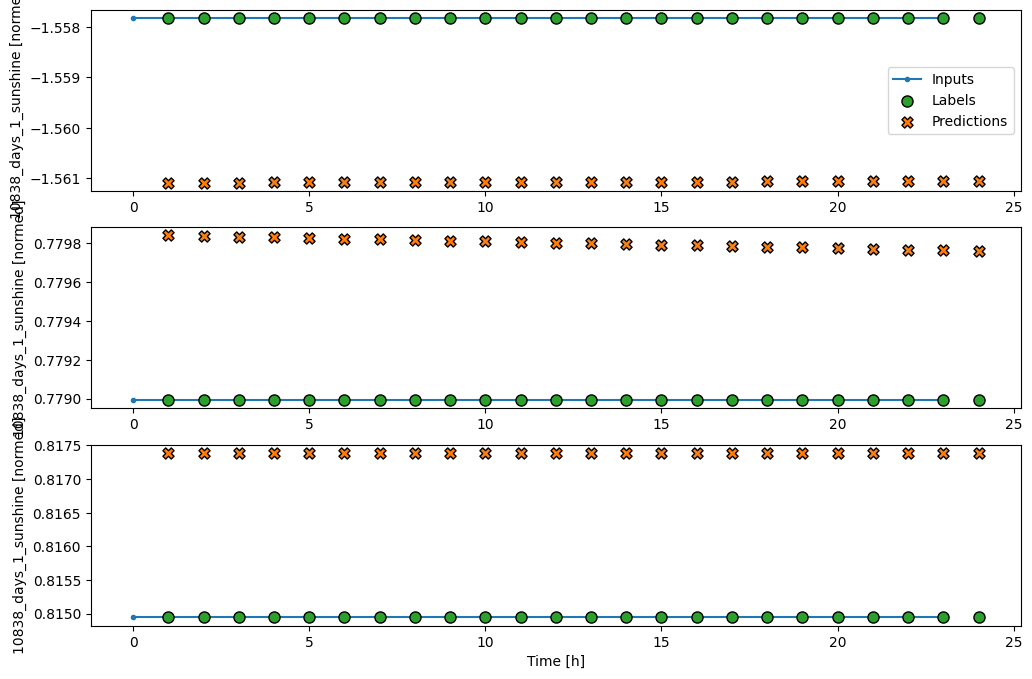

In [33]:
wide_window.plot(linear)


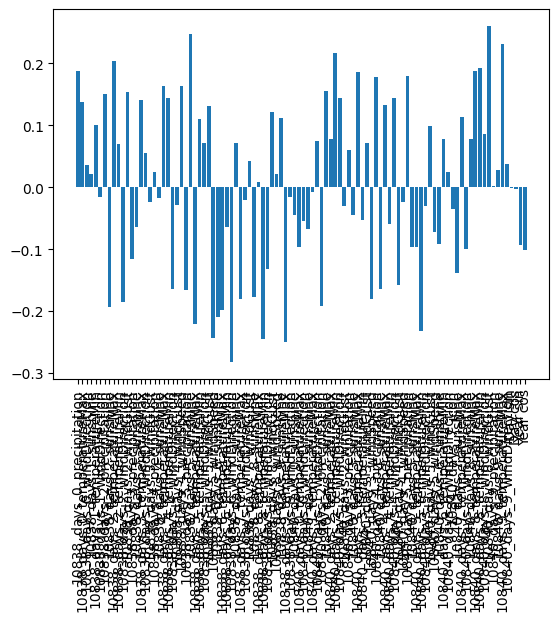

In [34]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)


In [35]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val, return_dict=True)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0, return_dict=True)


Epoch 1/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step - loss: 0.0289 - mean_absolute_error: 0.0536 - val_loss: 0.3143 - val_mean_absolute_error: 0.3353
Epoch 2/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - loss: 4.1086e-04 - mean_absolute_error: 0.0090 - val_loss: 0.2308 - val_mean_absolute_error: 0.3321
Epoch 3/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - loss: 3.1602e-04 - mean_absolute_error: 0.0086 - val_loss: 0.2864 - val_mean_absolute_error: 0.3694
Epoch 4/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step - loss: 0.0012 - mean_absolute_error: 0.0175 - val_loss: 0.3131 - val_mean_absolute_error: 0.2809
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.3196 - mean_absolute_error: 0.2865


In [36]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['10838_days_1_sunshine'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['10838_days_1_sunshine']

Text(0.5, 0.98, 'Given 3 hours of inputs, predict 1 hour into the future.')

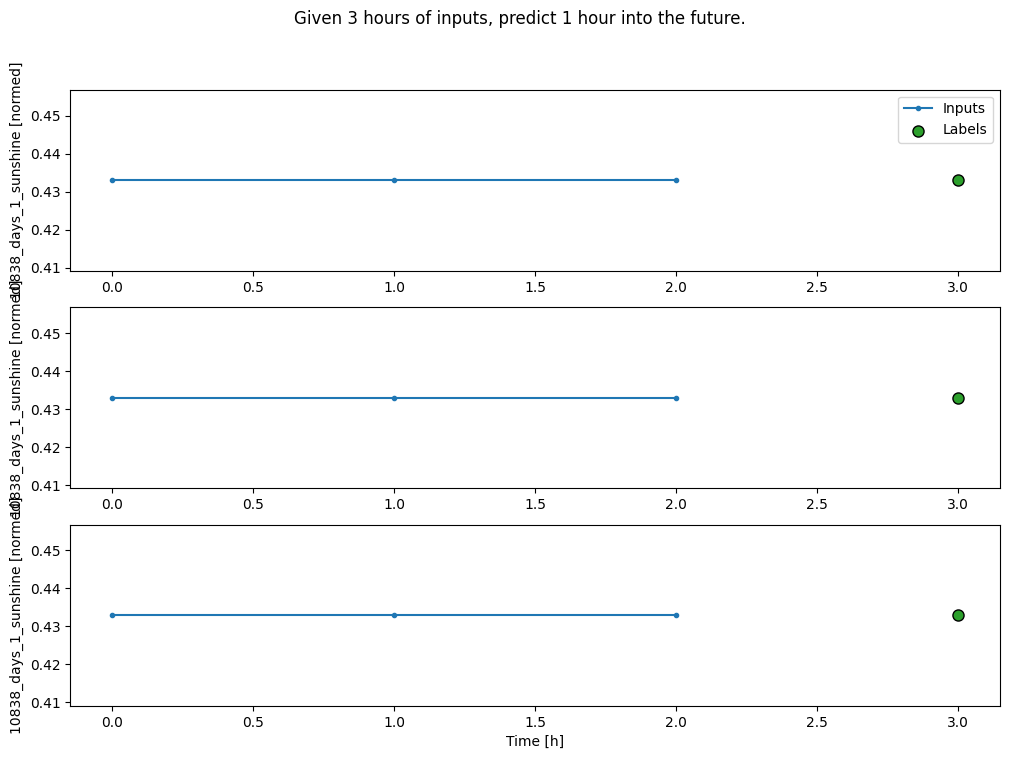

In [37]:
conv_window.plot()
plt.suptitle("Given 3 hours of inputs, predict 1 hour into the future.")


In [38]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])


In [39]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val, return_dict=True)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0, return_dict=True)


270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 1.1904 - mean_absolute_error: 0.8617


In [40]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')


Input shape: (32, 24, 100)

ValueError:Exception encountered when calling Sequential.call().

Input 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 300, but received input with shape (32, 2400)

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 24, 100), dtype=float32)
  • training=None
  • mask=None


In [41]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])


In [42]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)


Conv model on `conv_window`
Input shape: (32, 3, 100)
Output shape: (32, 1, 1)


In [43]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val, return_dict=True)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0, return_dict=True)


270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.7214 - mean_absolute_error: 0.6295


In [44]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)


Wide window
Input shape: (32, 24, 100)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


In [45]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['10838_days_1_sunshine'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['10838_days_1_sunshine']

In [46]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)


Wide conv window
Input shape: (32, 26, 100)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


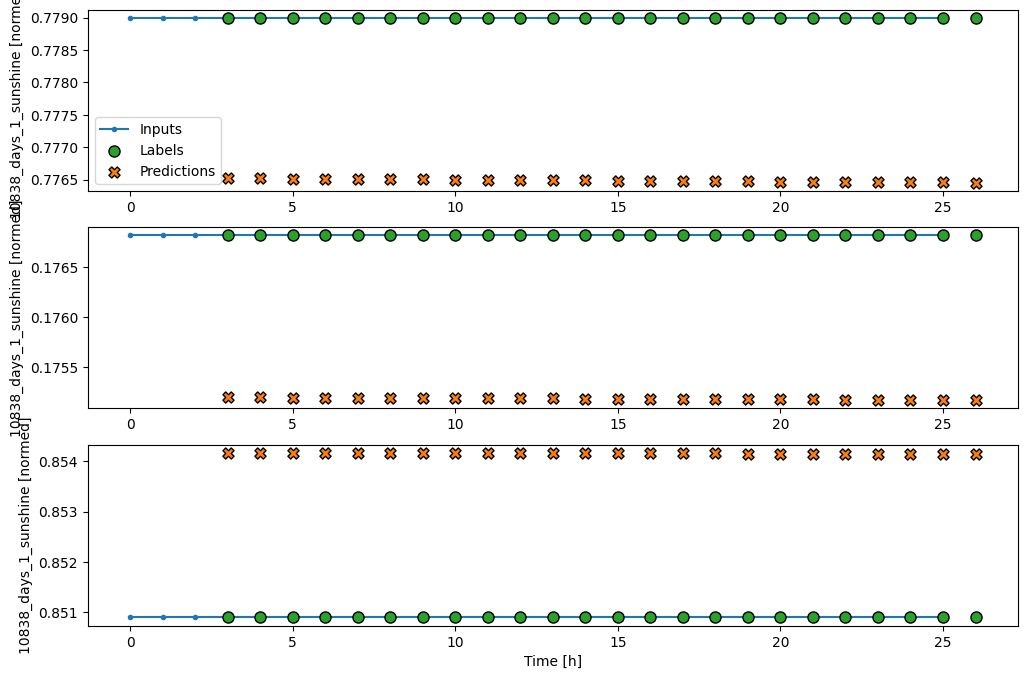

In [47]:
wide_conv_window.plot(conv_model)


In [48]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])


In [49]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)


Input shape: (32, 24, 100)
Output shape: (32, 24, 1)


In [50]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val, return_dict=True)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0, return_dict=True)


270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1160 - mean_absolute_error: 0.2818


In [51]:
cm = lstm_model.metrics[1]
cm.metrics

[<MeanAbsoluteError name=mean_absolute_error>]

In [52]:
val_performance

{'Baseline': {'loss': 2.1869022020837292e-05,
  'mean_absolute_error': 7.856600132072344e-05},
 'Linear': {'loss': 1.239200472831726,
  'mean_absolute_error': 0.9144896864891052},
 'Dense': {'loss': 0.31306007504463196,
  'mean_absolute_error': 0.2808849811553955},
 'Multi step dense': {'loss': 1.1766622066497803,
  'mean_absolute_error': 0.8551022410392761},
 'Conv': {'loss': 0.7250697612762451,
  'mean_absolute_error': 0.6332902908325195},
 'LSTM': {'loss': 0.1154652088880539,
  'mean_absolute_error': 0.2809472978115082}}

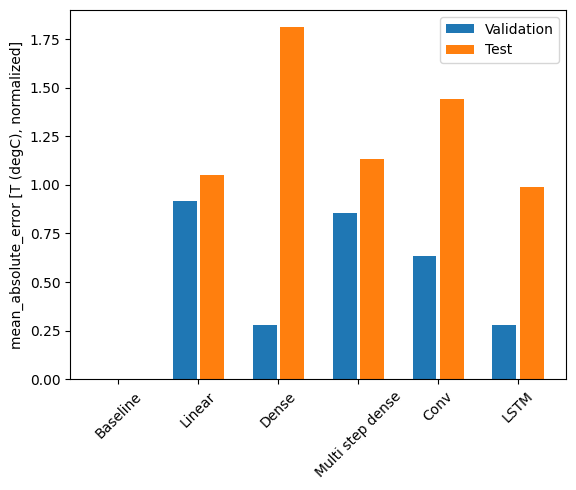

In [53]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
val_mae = [v[metric_name] for v in val_performance.values()]
test_mae = [v[metric_name] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()


In [54]:
for name, value in performance.items():
  print(f'{name:12s}: {value[metric_name]:0.4f}')


Baseline    : 0.0000
Linear      : 1.0520
Dense       : 1.8088
Multi step dense: 1.1317
Conv        : 1.4391
LSTM        : 0.9874


In [55]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')


Inputs shape (batch, time, features): (32, 24, 100)
Labels shape (batch, time, features): (32, 24, 100)


In [56]:
baseline = Baseline()
baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])


In [57]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val, return_dict=True)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0, return_dict=True)


270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 0.0022 - mean_absolute_error: 4.2508e-04   


In [58]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])


In [59]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val, return_dict=True)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0, return_dict=True)


270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 2.0643 - mean_absolute_error: 0.6861


In [60]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val, return_dict=True)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0, return_dict=True)

print()


270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2862 - mean_absolute_error: 0.7069

CPU times: user 27.8 s, sys: 3.78 s, total: 31.6 s
Wall time: 9.41 s


In [61]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [62]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val, return_dict=True)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0, return_dict=True)
print()


270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - mean_absolute_error: 0.0021

CPU times: user 28 s, sys: 3.63 s, total: 31.6 s
Wall time: 9.51 s


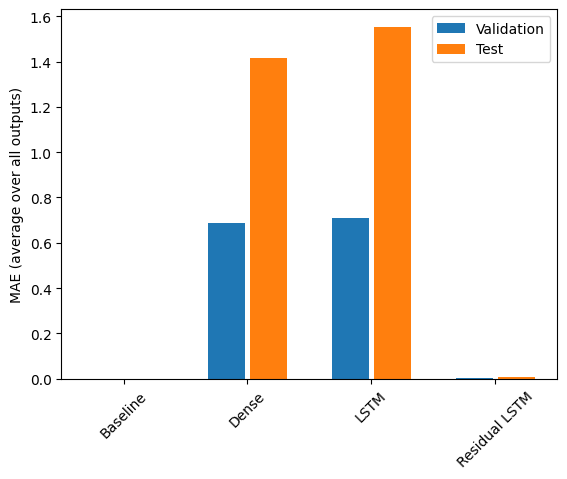

In [63]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
val_mae = [v[metric_name] for v in val_performance.values()]
test_mae = [v[metric_name] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()


In [80]:
for name, value in performance.items():
  print(f'{name:15s}: {value[metric_name]:0.4f}')


Baseline       : 0.0003
Dense          : 1.4166
LSTM           : 1.5543
Residual LSTM  : 0.0080


# Multistep Models

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

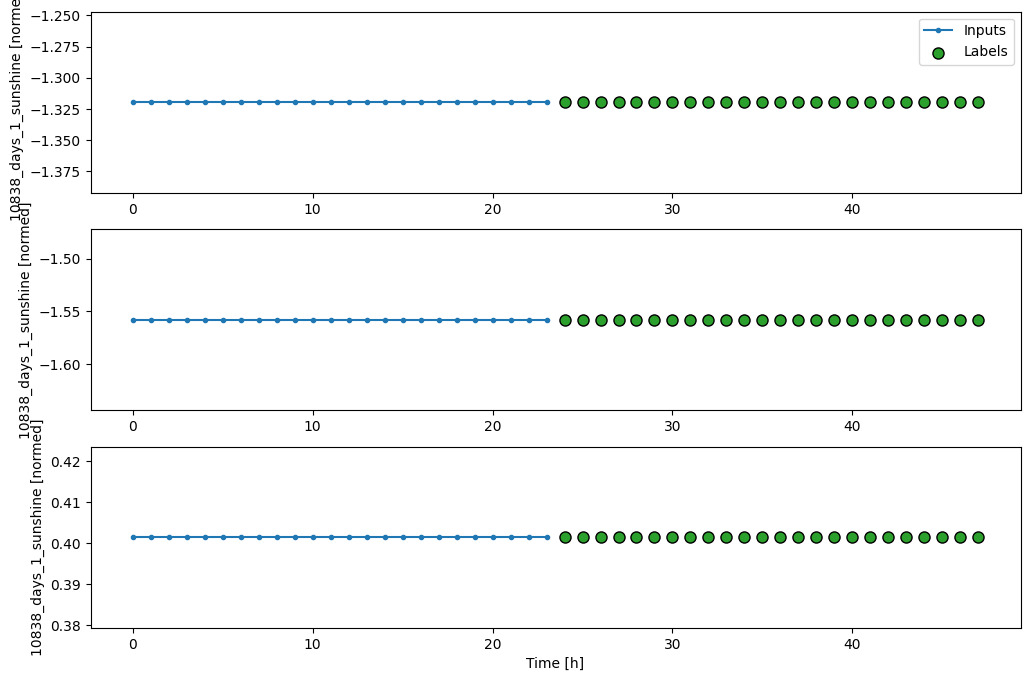

In [64]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 0.0325 - mean_absolute_error: 0.0059       


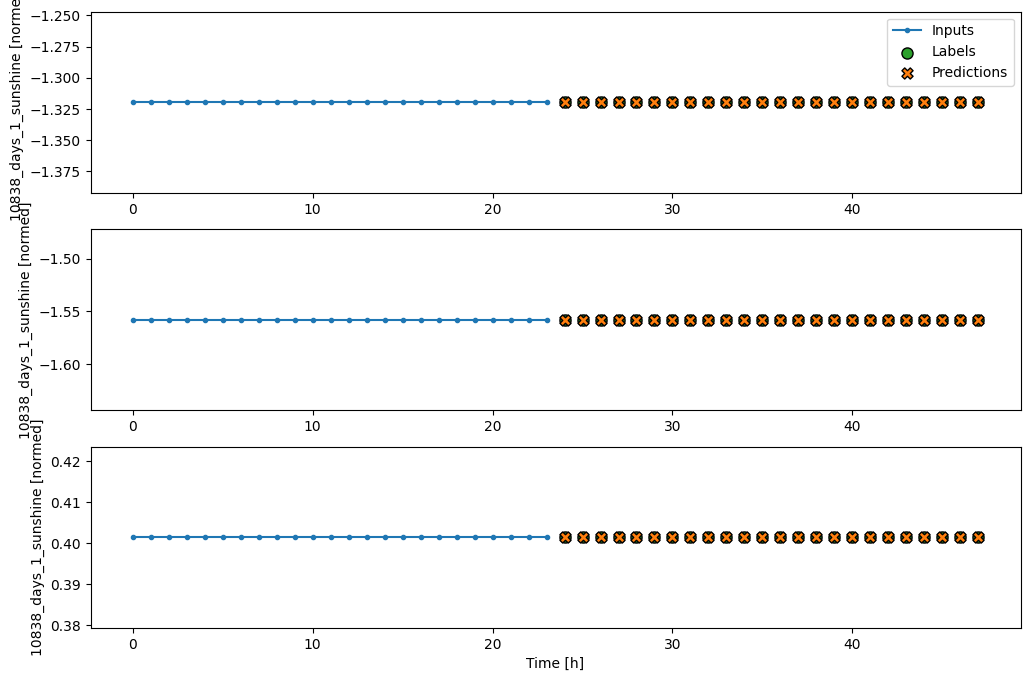

In [65]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val, return_dict=True)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(last_baseline)


269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 0.0492 - mean_absolute_error: 0.0095       


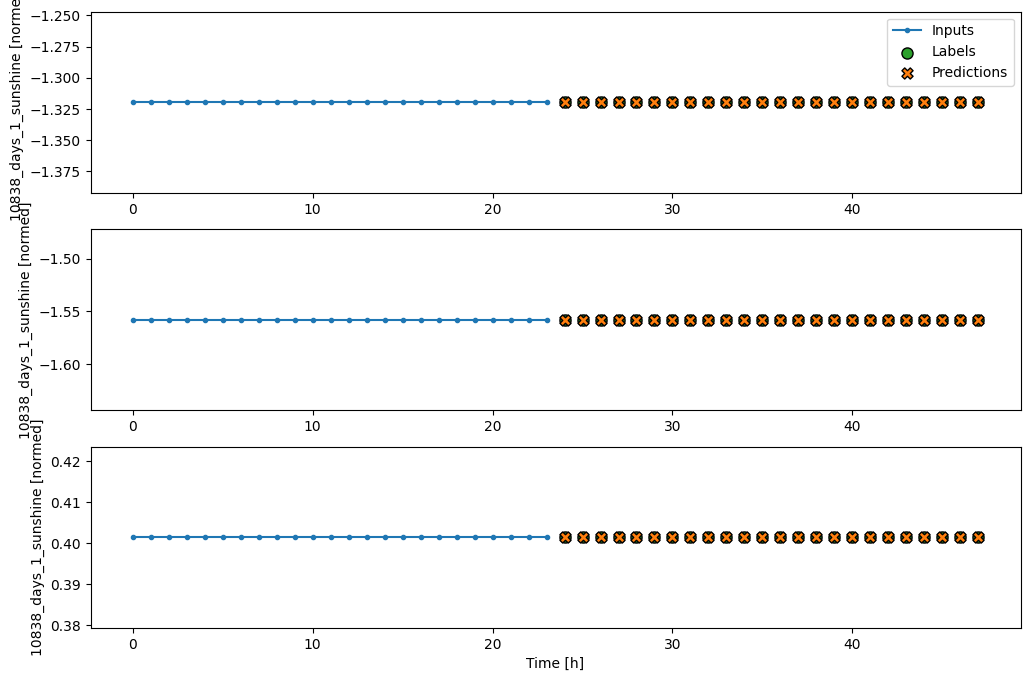

In [66]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                        metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val, return_dict=True)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(repeat_baseline)


269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 1.8747 - mean_absolute_error: 0.7023


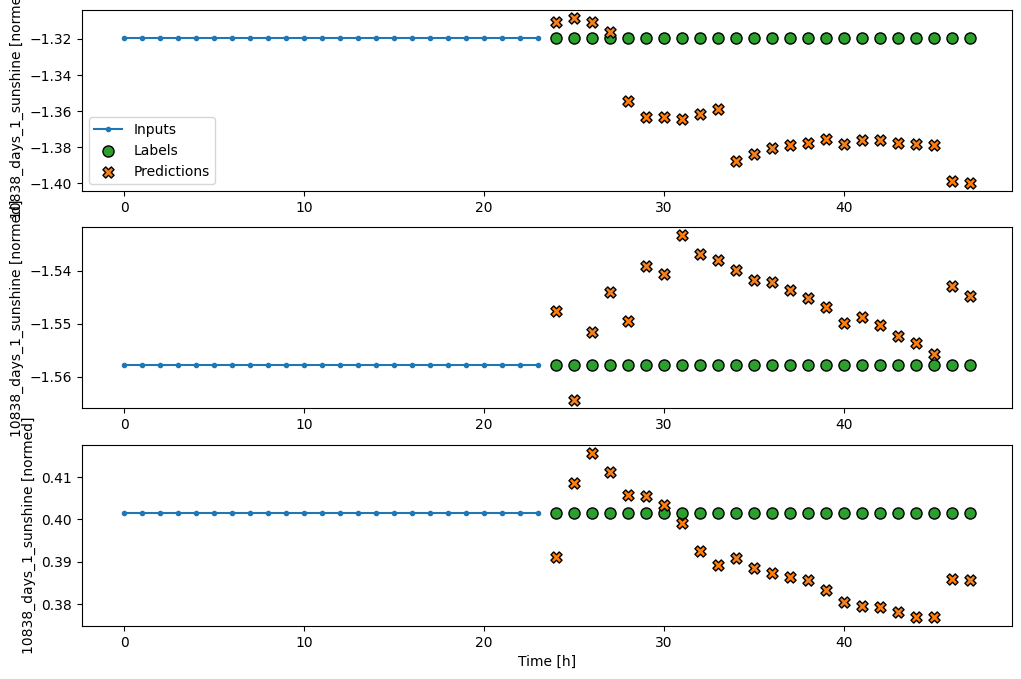

In [67]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val, return_dict=True)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_linear_model)


269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 1.4928 - mean_absolute_error: 0.5949


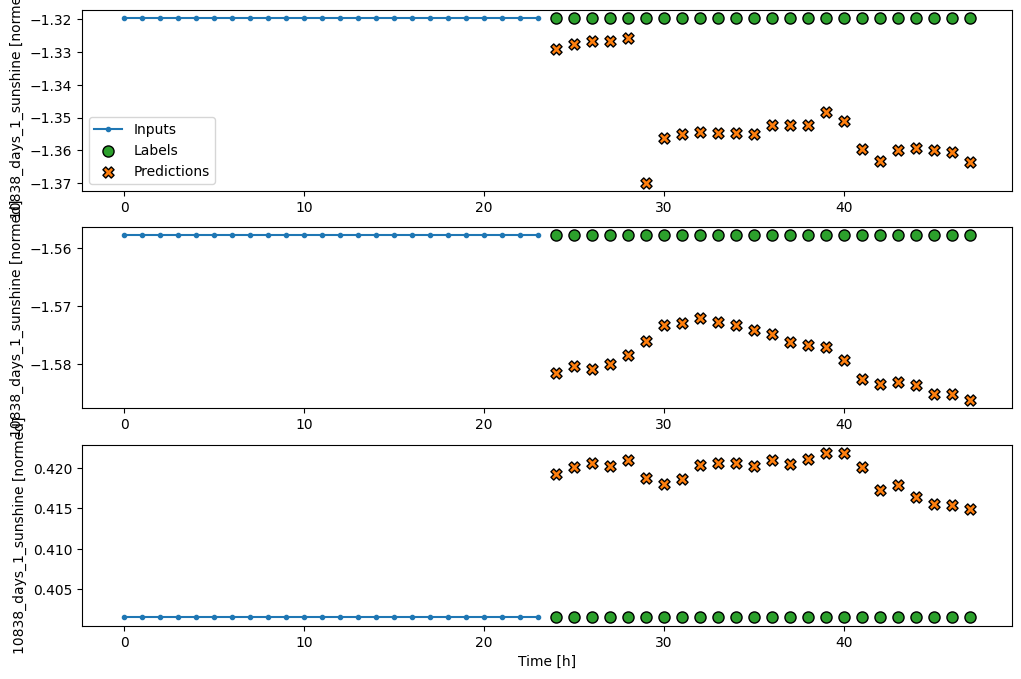

In [68]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val, return_dict=True)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_dense_model)


269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 1.5543 - mean_absolute_error: 0.5876


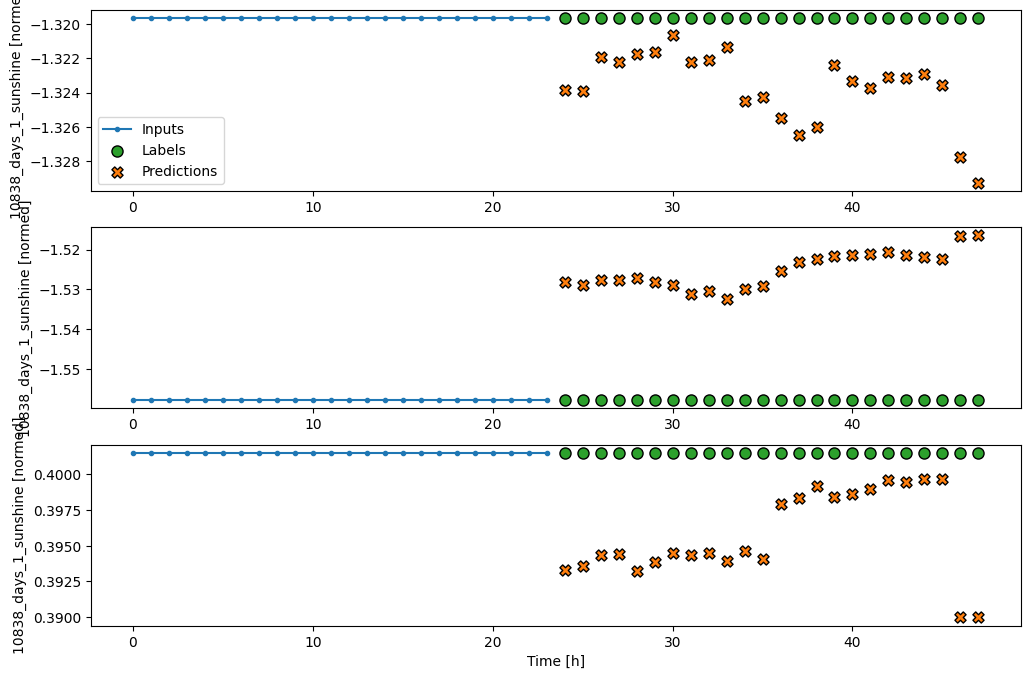

In [69]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val, return_dict=True)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_conv_model)


269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0973 - mean_absolute_error: 0.6977


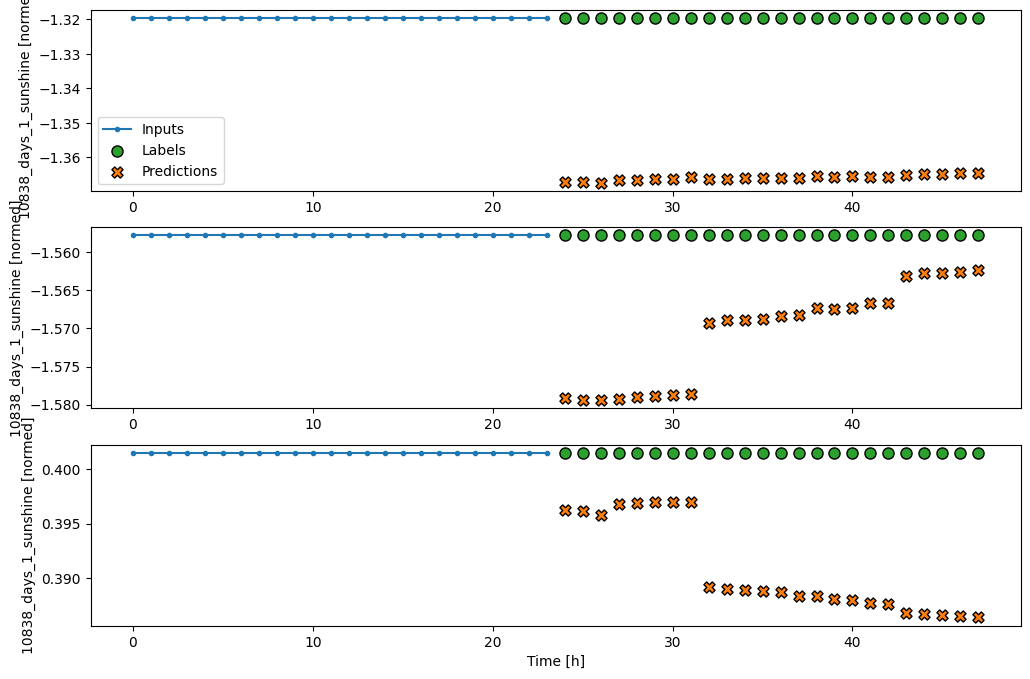

In [70]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val, return_dict=True)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_lstm_model)


In [71]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)


In [72]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)


In [73]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [74]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 100])

In [75]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [76]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)


Output shape (batch, time, features):  (32, 24, 100)


269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4807 - mean_absolute_error: 0.8175


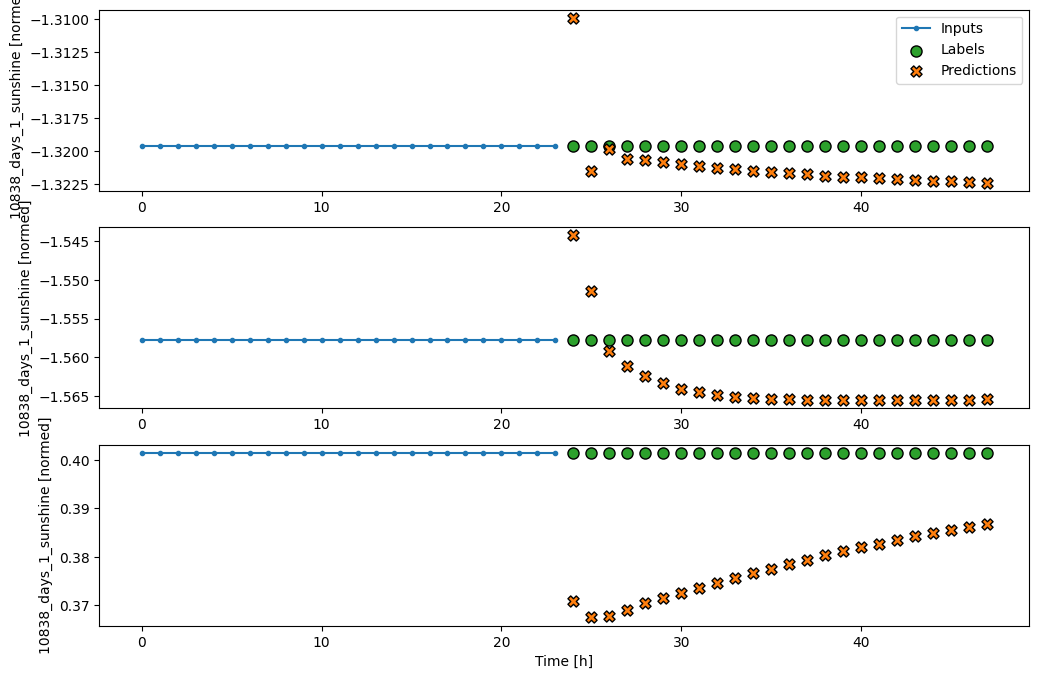

In [77]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val, return_dict=True)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(feedback_model)


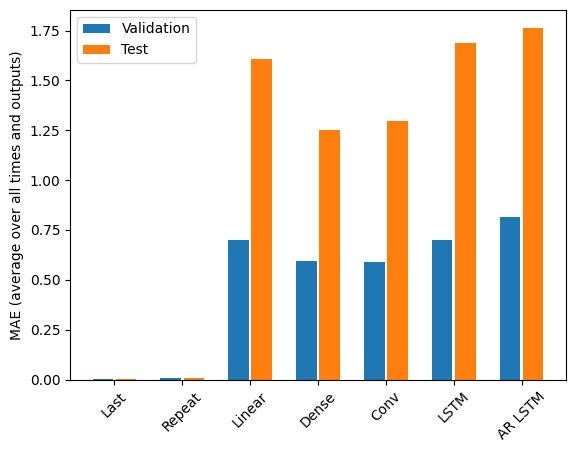

In [78]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
val_mae = [v[metric_name] for v in multi_val_performance.values()]
test_mae = [v[metric_name] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()


In [79]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[metric_name]:0.4f}')


Last    : 0.0036
Repeat  : 0.0069
Linear  : 1.6089
Dense   : 1.2503
Conv    : 1.2969
LSTM    : 1.6870
AR LSTM : 1.7647
